Importing and File Location

In [11]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


#creating Paths
path= r'C:\Users\wjzak\Dropbox\Career Foundry\Data Immersion\Module 4- Python Fundamentals for Data Analysts\07-2025 Instacart Basket Analysis'

#using the path to pull prepared data
full_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

In [14]:
full_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,frequency_flag,First Name,Last Name,Gender,State,Age,Date Joined,Number of Dependents,Martial Status,Income
0,1,Chocolate Sandwich Cookies,61.0,19.0,5.8,3139998.0,138,prior,28.0,6.0,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61.0,19.0,5.8,1977647.0,138,prior,30.0,6.0,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,1,Chocolate Sandwich Cookies,61.0,19.0,5.8,389851.0,709,prior,2.0,0.0,...,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302
3,1,Chocolate Sandwich Cookies,61.0,19.0,5.8,652770.0,764,prior,1.0,3.0,...,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308
4,1,Chocolate Sandwich Cookies,61.0,19.0,5.8,1813452.0,764,prior,3.0,4.0,...,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308


NOTE: Exercise code can be found in file for Exercise 4.9 included in zip

([<matplotlib.axis.XTick at 0x2538da896d0>,
 [Text(0, 0, 'Sunday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Friday'),
  Text(6, 0, 'Saturday')])

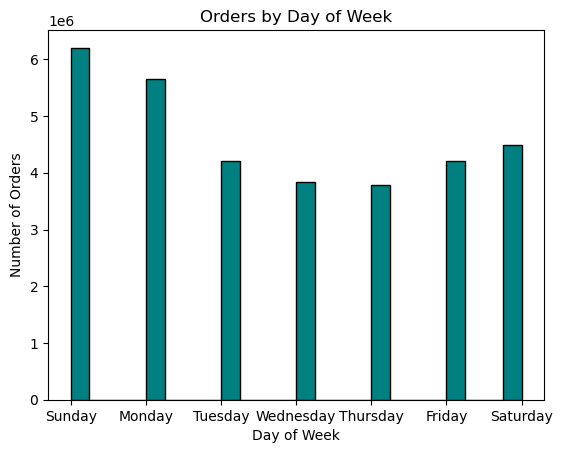

In [39]:
#create histogram for the day orders are created
histdotw = full_merge['orders_day_of_week'].plot.hist(bins = 24,edgecolor='black',color='teal')
plt.title("Orders by Day of Week")          
plt.xlabel("Day of Week")                      
plt.ylabel("Number of Orders")        
day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(ticks=range(7), labels=day_names)

Text(0, 0.5, 'Number of Orders')

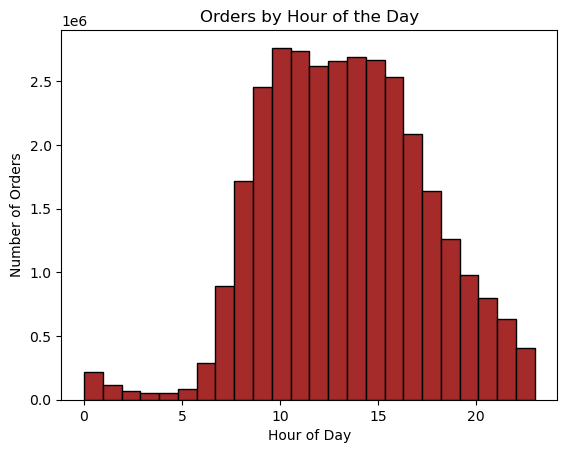

In [4]:
#create histogram for the time of day orders are created
hist = full_merge['order_hour_of_day'].plot.hist(bins = 24,edgecolor='black',color='brown')
plt.title("Orders by Hour of the Day")          
plt.xlabel("Hour of Day")                      
plt.ylabel("Number of Orders")          

The histogram above shows that the majority of the sales data on Instacart are from 8:00am to 5:00pm. The early morning hours have little to no activity and oddly there is no activity for 12p/Noon as well- this may have been removed at some point but I can assume this data shows the same trend here. 

Overall, stores are busy between 8a-5pm- with no activity overnight. This likely because most stores are not open overnight to fulfill these orders.

In [5]:
#this comand saves the figure listed
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9_hist.png'))

In [40]:
#this comand saves the figure listed
histdotw.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9_histdotw.png'))

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

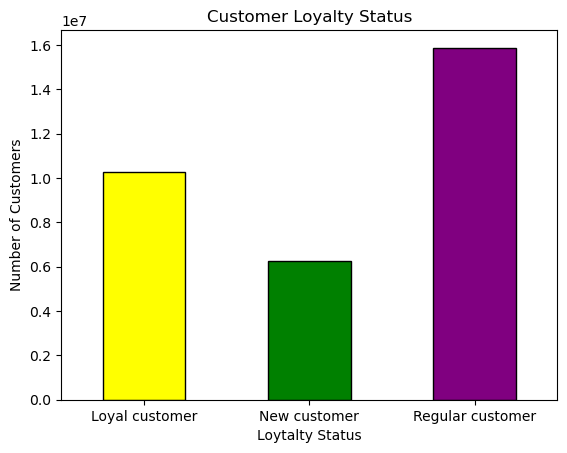

In [2]:
#creates a bar chart for loyalty flag
bar = full_merge['loyalty_flag'].value_counts().sort_index().plot.bar(color=['yellow','green','purple'], edgecolor='black')
plt.title("Customer Loyalty Status")          
plt.xlabel("Loytalty Status")                      
plt.ylabel("Number of Customers")   
plt.xticks(rotation=0)  

Regular customers are the most common and complet the most orders. The count on the left adds 7 0's to the number showing that loyal customers make up about 1 million orders while regular customers are closer to 1.6 million.

In [3]:
#this comand saves the figure listed
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9_bar.png'))

In [6]:
#sets a specific seed for reproducing this outcome
np.random.seed(4)
#setting length to 80% here so I can work with just 20% of the sample
dev = np.random.rand(len(full_merge)) <= 0.8

In [13]:
#stores 80% of the df under big
#big = full_merge[dev]

In [7]:
#stores 20% of the df under small
small = full_merge[~dev]

In [15]:
#reduces df even further to loyalty and prices
df_2 = small[['order_hour_of_day','prices']]

Text(0, 0.5, 'Average amount spent')

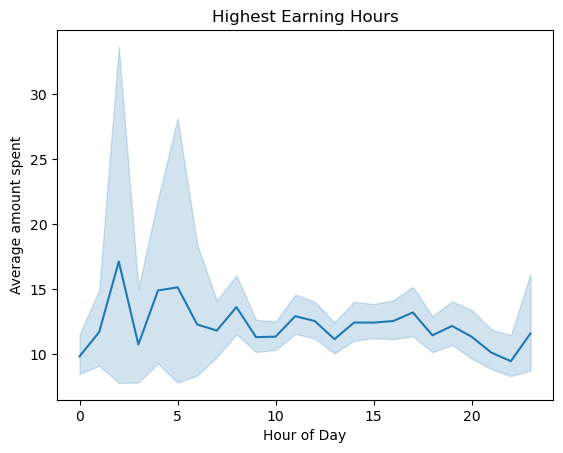

In [16]:
#compare order hour of day and prices in a line chart
line_oxp = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')
plt.title("Highest Earning Hours")          
plt.xlabel("Hour of Day")                      
plt.ylabel("Average amount spent")   

The data above shows that the items purchased overnight were actually quite expensive. These overnight purchases were much more costly than the information found at the remainder of the timeframes purchased. There was also more expensive products purchased at the beginning of the day.

In [17]:
#this comand saves the figure listed above
line_oxp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9_line_hour_price.png'))

In [41]:
#reduces df even further to variables listed below
df_3 = small[['loyalty_flag','orders_day_of_week','order_hour_of_day','prices']]

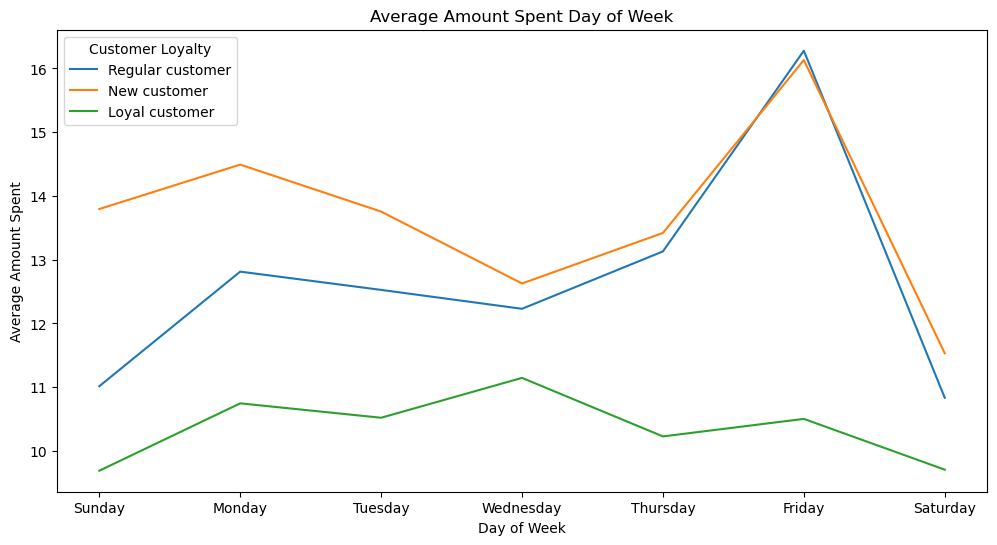

In [42]:
#create a line graph to understand how customer loyalty impacts purchasing
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_3, x='orders_day_of_week', y='prices',hue='loyalty_flag',estimator='mean', errorbar=None)
plt.title("Average Amount Spent Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Amount Spent")
plt.legend(title='Customer Loyalty')
day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(ticks=range(7), labels=day_names)

plt.savefig('C:/Users/wjzak/Dropbox/Career Foundry/Data Immersion/Module 4- Python Fundamentals for Data Analysts/07-2025 Instacart Basket Analysis/04 Analysis/Visualizations/Loyalty_by_dotw.png')

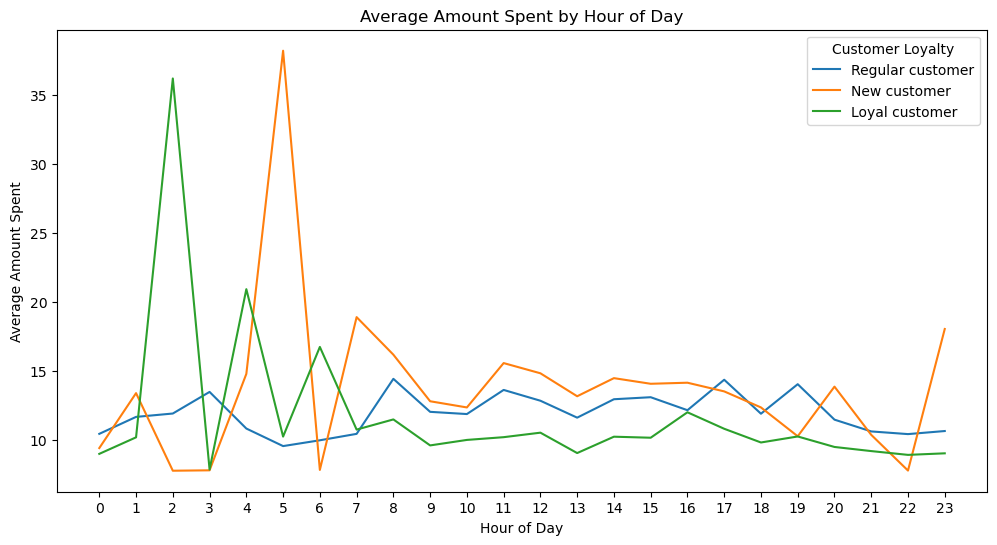

In [31]:
#create a line graph to understand how customer loyalty impacts purchasing
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_3, x='order_hour_of_day', y='prices',hue='loyalty_flag',estimator='mean', errorbar=None)
plt.title("Average Amount Spent by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Amount Spent")
plt.xticks(range(0, 24))
plt.legend(title='Customer Loyalty')
plt.savefig('C:/Users/wjzak/Dropbox/Career Foundry/Data Immersion/Module 4- Python Fundamentals for Data Analysts/07-2025 Instacart Basket Analysis/04 Analysis/Visualizations/Loyalty_by_hour_of_day.png')

In [32]:
#reduces df even further to martial status, age, and number of dependents
df_4 = small[['Martial Status','Age', 'Number of Dependents']]

Text(0, 0.5, 'Average Number of Dependents')

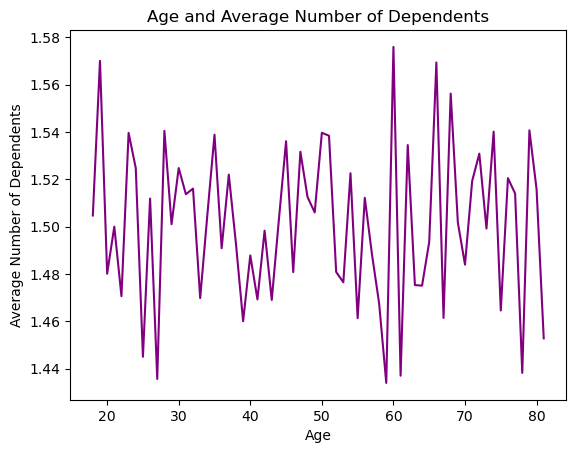

In [33]:
#compare age and dependents
line_axd = sns.lineplot(data = df_4, x = 'Age',y = 'Number of Dependents', color='purple', errorbar=None)
plt.title("Age and Average Number of Dependents")          
plt.xlabel("Age")                      
plt.ylabel("Average Number of Dependents")   

This graph shows that the number of dependents varies between 1.4 to 1.6 for all of those using the app. This is likely skewed slightly cause of the sheer volume of users in this sample tested. There are likely people who do not have children but the majority have at least 1-2 children.

In [39]:
#this comand saves the figure listed above
line_axd.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9_line_Age_Dependent.png'))

Text(0.5, 1.0, 'Age and Income')

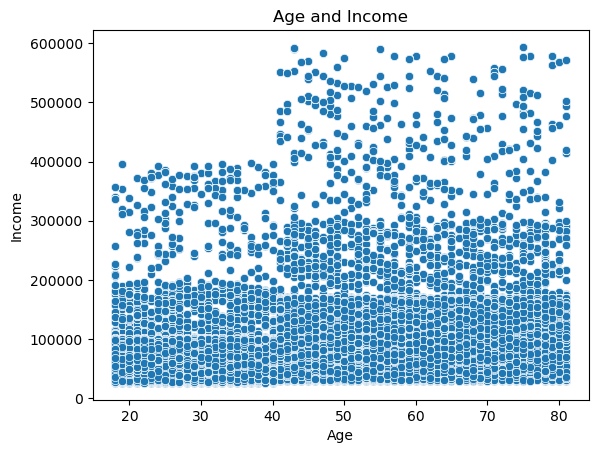

In [42]:
#creating a scatterplot of 'Age' and 'Income'
scatter = sns.scatterplot(x='Age', y='Income', data=small)
plt.title("Age and Income")          

The scatter plot shows that the older users over 40 can have much stronger incomes by a large amount. There are many users that are still relatively low income across all ages but the 40+ group can have an abundance of money.

In [43]:
#this comand saves the figure listed above
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.9_scatter.png'))